In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt

In [17]:
companies_df = pd.read_csv("/Users/saqib/Downloads/archive/companies.csv")
industries_df = pd.read_csv("/Users/saqib/Downloads/archive/industries.csv")
region_df = pd.read_csv("/Users/saqib/Downloads/archive/regions.csv")
founder_df = pd.read_csv("/Users/saqib/Downloads/archive/founders.csv")
school_df = pd.read_csv("/Users/saqib/Downloads/archive/schools.csv")

In [9]:
# I will use the number of employees and status as the ‘success’ status 
successful_companies = companies_df[(companies_df['status'] == 'Active') & (companies_df['teamSize'] > 100)]

print(f"Number of successful companies with a team size greater than 100: {successful_companies.shape[0]}")

Number of successful companies with a team size greater than 100: 260


In [11]:
successful_companies_with_industries = pd.merge(successful_companies, industries_df, left_on="id", right_on="id", how="left")
successful_companies_with_industries.head()

Unnamed: 0_x   id      name      slug              website  \
0             9  356    Scribd    scribd    http://scribd.com   
1             9  356    Scribd    scribd    http://scribd.com   
2           118  248  Mixpanel  mixpanel  http://mixpanel.com   
3           118  248  Mixpanel  mixpanel  http://mixpanel.com   
4           119  240    Stripe    stripe    http://stripe.com   

                                        smallLogoUrl  \
0  https://bookface-images.s3.amazonaws.com/small...   
1  https://bookface-images.s3.amazonaws.com/small...   
2  https://bookface-images.s3.amazonaws.com/small...   
3  https://bookface-images.s3.amazonaws.com/small...   
4  https://bookface-images.s3.amazonaws.com/small...   

                                            oneLiner  \
0                    World's largest online library.   
1                    World's largest online library.   
2  Mixpanel is event analytics for builders that ...   
3  Mixpanel is event analytics for builders that ...   
4          Economic infrastructure for the internet.   

                                     longDescription  teamSize  \
0  Scribd gives you access to millions of ebooks,...     300.0   
1  Scribd gives you access to millions of ebooks,...     300.0   
2  Mixpanel is analytics for builders that need a...     410.0   
3  Mixpanel is analytics for builders that need a...     410.0   
4  Launched out of Y Combinator’s 2009 Summer bat...    7000.0   

                                              url batch  status  Unnamed: 0_y  \
0    https://www.ycombinator.com/companies/scribd   S06  Active          17.0   
1    https://www.ycombinator.com/companies/scribd   S06  Active          18.0   
2  https://www.ycombinator.com/companies/mixpanel   S09  Active         235.0   
3  https://www.ycombinator.com/companies/mixpanel   S09  Active         236.0   
4    https://www.ycombinator.com/companies/stripe   S09  Active         237.0   

    industry  
0   Consumer  
1    Content  
2        B2B  
3  Analytics  
4    Fintech

Distribution of successful companies by industry

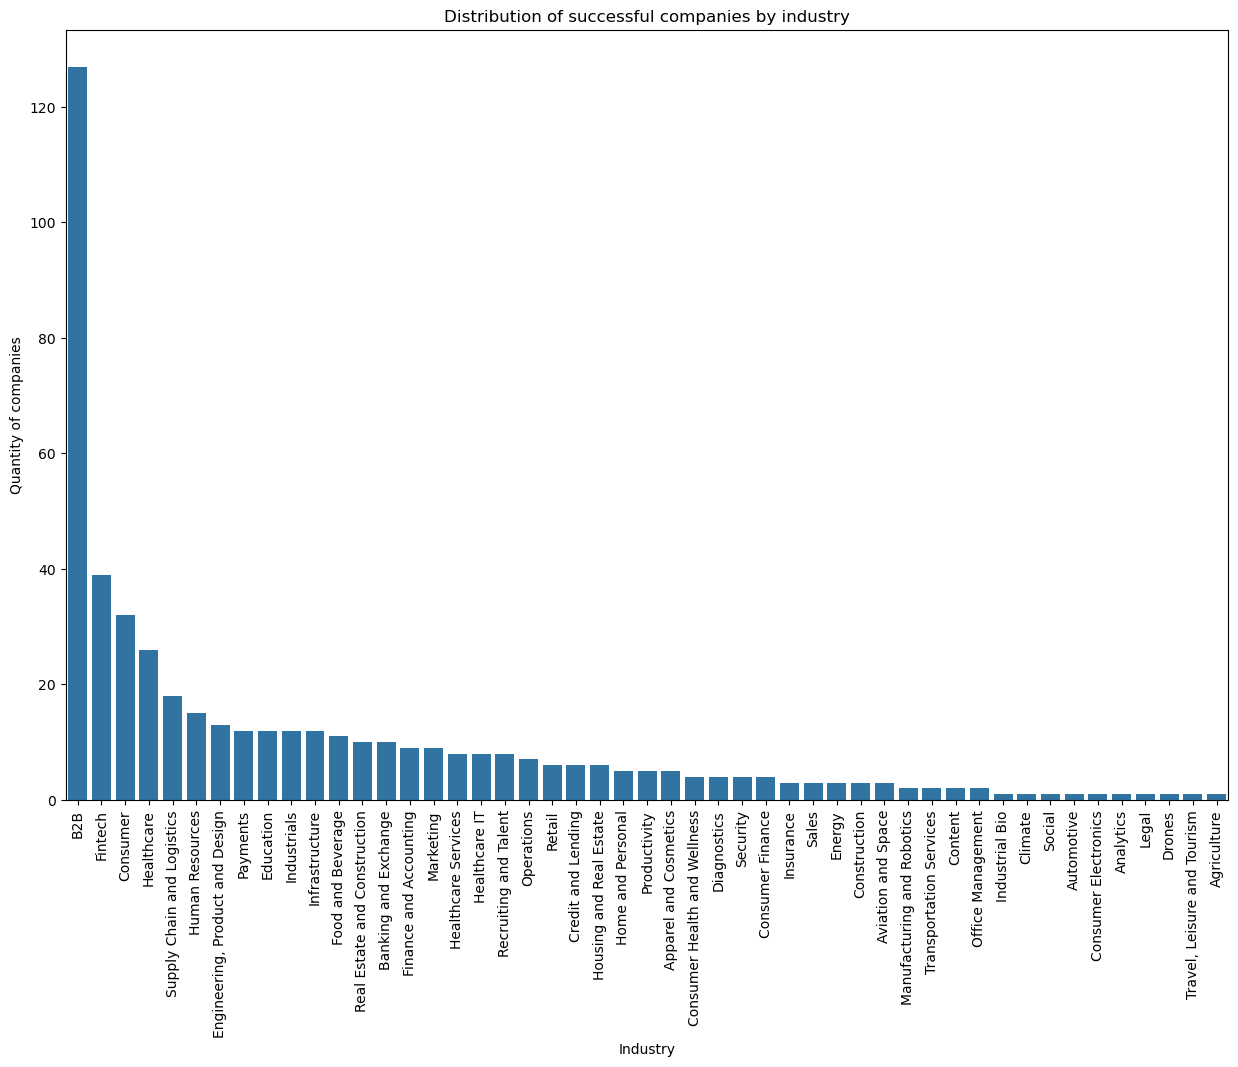

In [13]:
industry_counts_df = successful_companies_with_industries['industry'].value_counts().reset_index()
industry_counts_df.columns = ['industry', 'count']

plt.figure(figsize=(15, 10))
sns.barplot(x='industry', y='count', data=industry_counts_df)

plt.title('Distribution of successful companies by industry')
plt.xlabel('Industry')
plt.ylabel('Quantity of companies')
plt.xticks(rotation=90)

plt.show()

In [19]:
successful_companies_with_regions = pd.merge(successful_companies, region_df, left_on='id', right_on='id', how='left')
successful_companies_with_regions.head()

Unnamed: 0_x   id      name      slug              website  \
0             9  356    Scribd    scribd    http://scribd.com   
1           118  248  Mixpanel  mixpanel  http://mixpanel.com   
2           119  240    Stripe    stripe    http://stripe.com   
3           174  200  inDinero  indinero  http://indinero.com   
4           175  198    Docker    docker    http://docker.com   

                                        smallLogoUrl  \
0  https://bookface-images.s3.amazonaws.com/small...   
1  https://bookface-images.s3.amazonaws.com/small...   
2  https://bookface-images.s3.amazonaws.com/small...   
3  https://bookface-images.s3.amazonaws.com/small...   
4  https://bookface-images.s3.amazonaws.com/small...   

                                            oneLiner  \
0                    World's largest online library.   
1  Mixpanel is event analytics for builders that ...   
2          Economic infrastructure for the internet.   
3                Financial dashboard for businesses.   
4                     Software development platform.   

                                     longDescription  teamSize  \
0  Scribd gives you access to millions of ebooks,...     300.0   
1  Mixpanel is analytics for builders that need a...     410.0   
2  Launched out of Y Combinator’s 2009 Summer bat...    7000.0   
3  inDinero is on a mission to reinvent small bus...     250.0   
4  Docker is the world’s leading software contain...     201.0   

                                              url batch  status  Unnamed: 0_y  \
0    https://www.ycombinator.com/companies/scribd   S06  Active             9   
1  https://www.ycombinator.com/companies/mixpanel   S09  Active           118   
2    https://www.ycombinator.com/companies/stripe   S09  Active           119   
3  https://www.ycombinator.com/companies/indinero   S10  Active           174   
4    https://www.ycombinator.com/companies/docker   S10  Active           175   

             region                   country                 address  
0  America / Canada  United States of America  San Francisco, CA, USA  
1  America / Canada  United States of America  San Francisco, CA, USA  
2  America / Canada  United States of America  San Francisco, CA, USA  
3  America / Canada  United States of America    Los Angeles, CA, USA  
4  America / Canada  United States of America  San Francisco, CA, USA

Distribution of successful companies by region

/var/folders/2c/hpk9j8md6h71406dzkc5_w1m0000gn/T/ipykernel_63579/2054152573.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


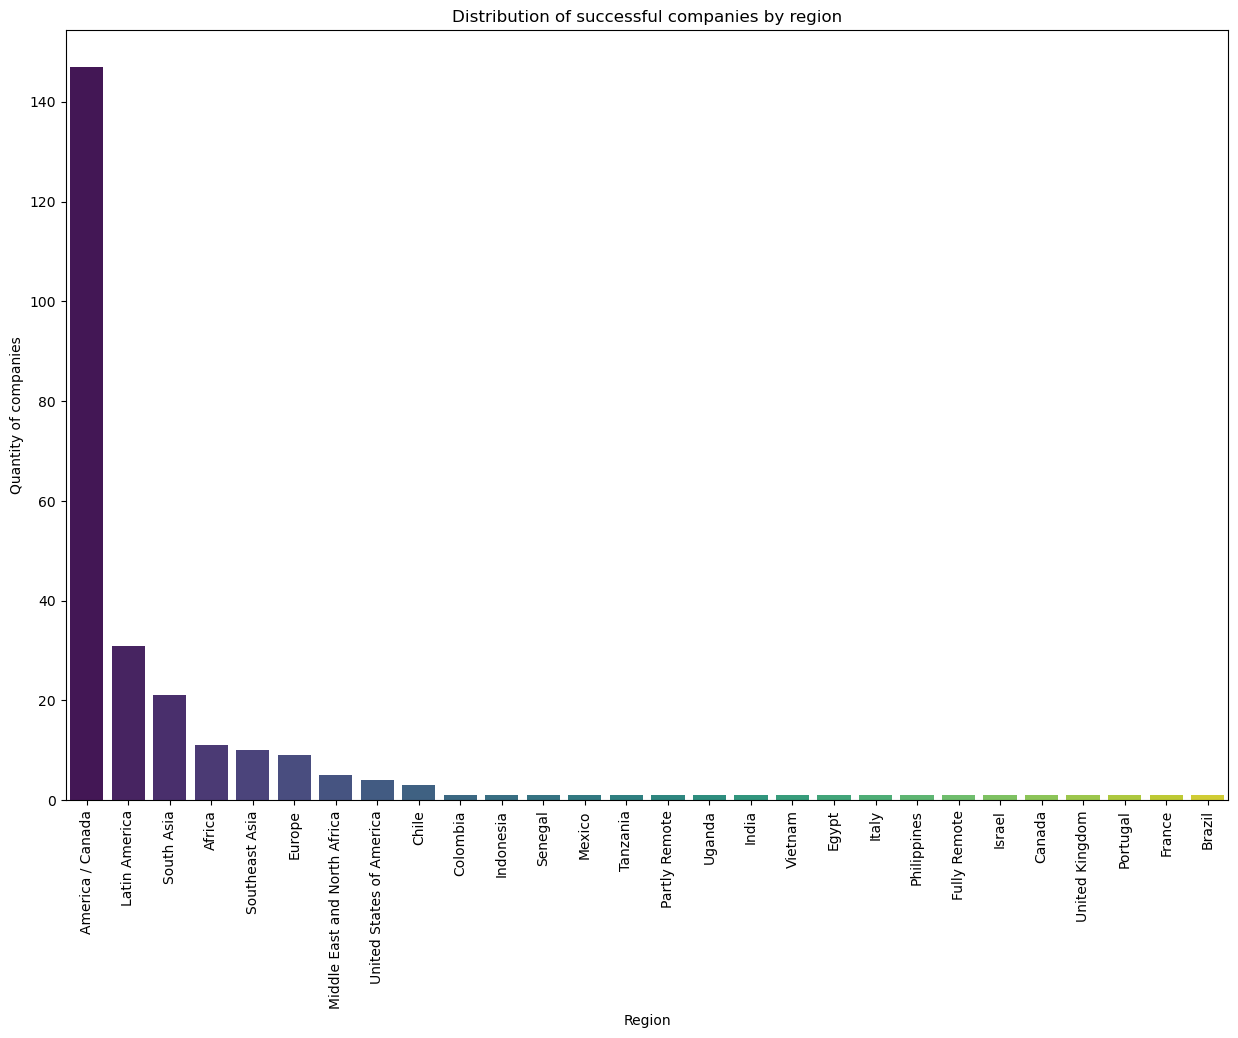

In [21]:
region_counts = successful_companies_with_regions['region'].value_counts()

plt.figure(figsize=(15, 10))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Distribution of successful companies by region')
plt.xlabel('Region')
plt.ylabel('Quantity of companies')
plt.xticks(rotation=90)
plt.show()

In [25]:
founders_with_schools = pd.merge(founder_df, school_df, on='hnid', how='left')
successful_companies_with_founders = pd.merge(successful_companies, founders_with_schools, left_on='slug', right_on='company_slug', how='left')
successful_companies_with_founders.head()

Unnamed: 0   id    name    slug            website  \
0           9  356  Scribd  scribd  http://scribd.com   
1           9  356  Scribd  scribd  http://scribd.com   
2           9  356  Scribd  scribd  http://scribd.com   
3           9  356  Scribd  scribd  http://scribd.com   
4           9  356  Scribd  scribd  http://scribd.com   

                                        smallLogoUrl  \
0  https://bookface-images.s3.amazonaws.com/small...   
1  https://bookface-images.s3.amazonaws.com/small...   
2  https://bookface-images.s3.amazonaws.com/small...   
3  https://bookface-images.s3.amazonaws.com/small...   
4  https://bookface-images.s3.amazonaws.com/small...   

                          oneLiner  \
0  World's largest online library.   
1  World's largest online library.   
2  World's largest online library.   
3  World's largest online library.   
4  World's largest online library.   

                                     longDescription  teamSize  \
0  Scribd gives you access to millions of ebooks,...     300.0   
1  Scribd gives you access to millions of ebooks,...     300.0   
2  Scribd gives you access to millions of ebooks,...     300.0   
3  Scribd gives you access to millions of ebooks,...     300.0   
4  Scribd gives you access to millions of ebooks,...     300.0   

                                            url  ... last_name  hnid  \
0  https://www.ycombinator.com/companies/scribd  ...     Adler  trip   
1  https://www.ycombinator.com/companies/scribd  ...     Adler  trip   
2  https://www.ycombinator.com/companies/scribd  ...     Adler  trip   
3  https://www.ycombinator.com/companies/scribd  ...     Adler  trip   
4  https://www.ycombinator.com/companies/scribd  ...     Adler  trip   

                                        avatar_thumb current_company  \
0  https://bookface-images.s3.amazonaws.com/avata...             NaN   
1  https://bookface-images.s3.amazonaws.com/avata...             NaN   
2  https://bookface-images.s3.amazonaws.com/avata...             NaN   
3  https://bookface-images.s3.amazonaws.com/avata...             NaN   
4  https://bookface-images.s3.amazonaws.com/avata...             NaN   

  current_title company_slug top_company              school field_of_study  \
0           NaN       scribd       False  Harvard University            NaN   
1           NaN       scribd       False  Harvard University            NaN   
2           NaN       scribd       False  Harvard University            NaN   
3           NaN       scribd       False  Harvard University            NaN   
4           NaN       scribd       False  Harvard University            NaN   

     year  
0  2002.0  
1  2003.0  
2  2004.0  
3  2005.0  
4  2006.0  

[5 rows x 23 columns]

Top 10 educational institutions of the founders of successful companies

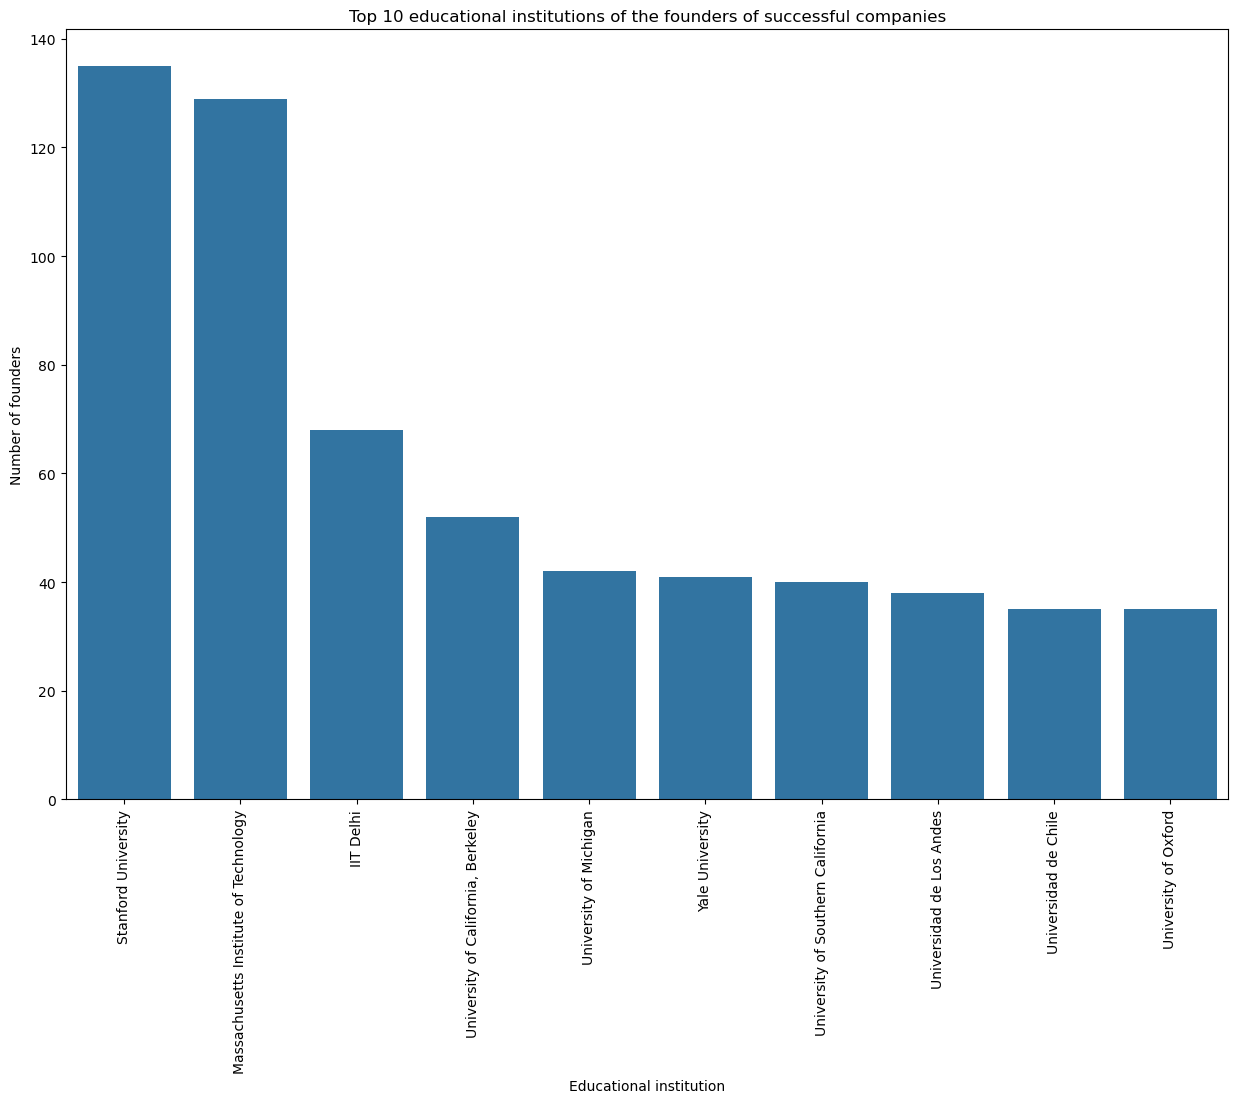

In [27]:
school_counts_df = successful_companies_with_founders['school'].value_counts().reset_index().head(10)
school_counts_df.columns = ['school', 'count']

plt.figure(figsize=(15, 10))
sns.barplot(x='school', y='count', data=school_counts_df)

plt.title('Top 10 educational institutions of the founders of successful companies')
plt.xlabel('Educational institution')
plt.ylabel('Number of founders')
plt.xticks(rotation=90)

plt.show()

In [31]:
successful_companies_full = pd.merge(successful_companies_with_industries, region_df, on='id', how='left')
successful_companies_full = pd.merge(successful_companies_full, founders_with_schools, left_on='slug', right_on='company_slug', how='left')
successful_companies_full.head()

Unnamed: 0_x   id    name    slug            website  \
0             9  356  Scribd  scribd  http://scribd.com   
1             9  356  Scribd  scribd  http://scribd.com   
2             9  356  Scribd  scribd  http://scribd.com   
3             9  356  Scribd  scribd  http://scribd.com   
4             9  356  Scribd  scribd  http://scribd.com   

                                        smallLogoUrl  \
0  https://bookface-images.s3.amazonaws.com/small...   
1  https://bookface-images.s3.amazonaws.com/small...   
2  https://bookface-images.s3.amazonaws.com/small...   
3  https://bookface-images.s3.amazonaws.com/small...   
4  https://bookface-images.s3.amazonaws.com/small...   

                          oneLiner  \
0  World's largest online library.   
1  World's largest online library.   
2  World's largest online library.   
3  World's largest online library.   
4  World's largest online library.   

                                     longDescription  teamSize  \
0  Scribd gives you access to millions of ebooks,...     300.0   
1  Scribd gives you access to millions of ebooks,...     300.0   
2  Scribd gives you access to millions of ebooks,...     300.0   
3  Scribd gives you access to millions of ebooks,...     300.0   
4  Scribd gives you access to millions of ebooks,...     300.0   

                                            url  ... last_name  hnid  \
0  https://www.ycombinator.com/companies/scribd  ...     Adler  trip   
1  https://www.ycombinator.com/companies/scribd  ...     Adler  trip   
2  https://www.ycombinator.com/companies/scribd  ...     Adler  trip   
3  https://www.ycombinator.com/companies/scribd  ...     Adler  trip   
4  https://www.ycombinator.com/companies/scribd  ...     Adler  trip   

                                        avatar_thumb current_company  \
0  https://bookface-images.s3.amazonaws.com/avata...             NaN   
1  https://bookface-images.s3.amazonaws.com/avata...             NaN   
2  https://bookface-images.s3.amazonaws.com/avata...             NaN   
3  https://bookface-images.s3.amazonaws.com/avata...             NaN   
4  https://bookface-images.s3.amazonaws.com/avata...             NaN   

   current_title company_slug top_company              school field_of_study  \
0            NaN       scribd       False  Harvard University            NaN   
1            NaN       scribd       False  Harvard University            NaN   
2            NaN       scribd       False  Harvard University            NaN   
3            NaN       scribd       False  Harvard University            NaN   
4            NaN       scribd       False  Harvard University            NaN   

     year  
0  2002.0  
1  2003.0  
2  2004.0  
3  2005.0  
4  2006.0  

[5 rows x 29 columns]

Correlations between team size, industries, regions and founder education

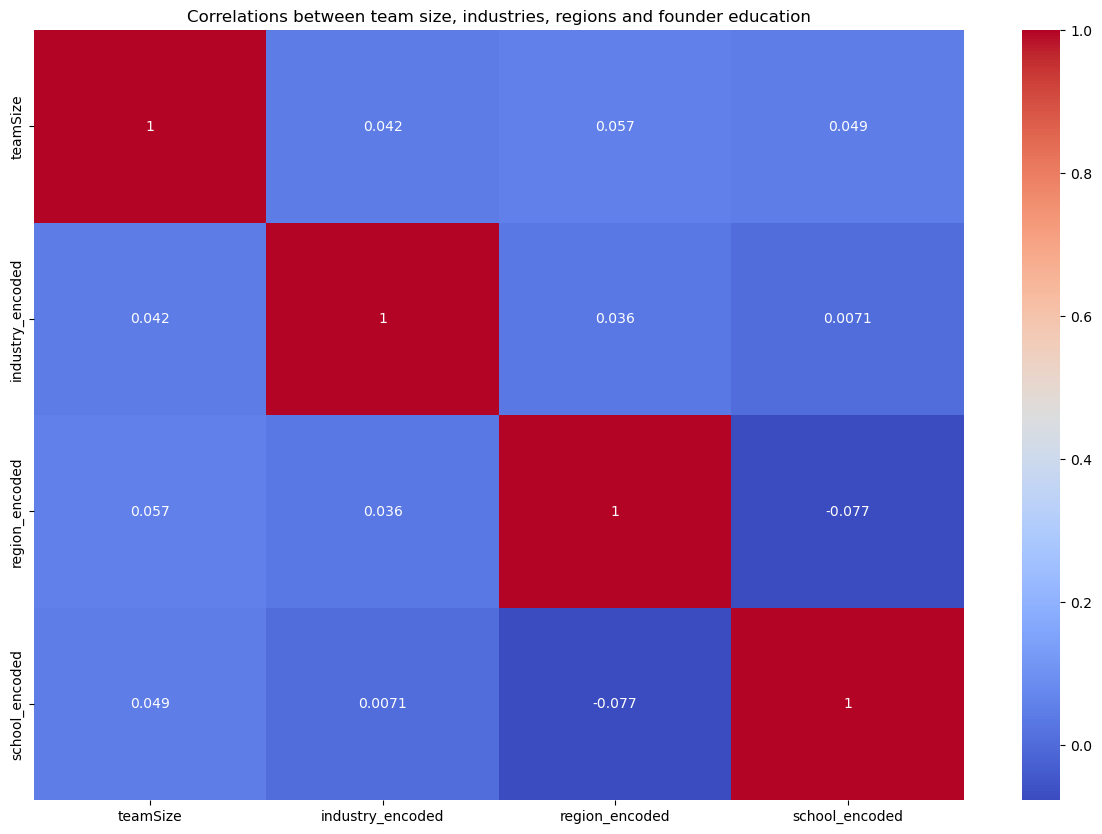

In [33]:
successful_companies_full['industry_encoded'] = successful_companies_full['industry'].astype('category').cat.codes
successful_companies_full['region_encoded'] = successful_companies_full['region'].astype('category').cat.codes
successful_companies_full['school_encoded'] = successful_companies_full['school'].astype('category').cat.codes
corr_matrix = successful_companies_full[['teamSize', 'industry_encoded', 'region_encoded', 'school_encoded']].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlations between team size, industries, regions and founder education')
plt.show()

In [37]:
successful_companies_with_regions = pd.merge(successful_companies_with_industries, region_df, on='id', how='left')
successful_companies_with_regions.head()

Unnamed: 0_x   id      name      slug              website  \
0             9  356    Scribd    scribd    http://scribd.com   
1             9  356    Scribd    scribd    http://scribd.com   
2           118  248  Mixpanel  mixpanel  http://mixpanel.com   
3           118  248  Mixpanel  mixpanel  http://mixpanel.com   
4           119  240    Stripe    stripe    http://stripe.com   

                                        smallLogoUrl  \
0  https://bookface-images.s3.amazonaws.com/small...   
1  https://bookface-images.s3.amazonaws.com/small...   
2  https://bookface-images.s3.amazonaws.com/small...   
3  https://bookface-images.s3.amazonaws.com/small...   
4  https://bookface-images.s3.amazonaws.com/small...   

                                            oneLiner  \
0                    World's largest online library.   
1                    World's largest online library.   
2  Mixpanel is event analytics for builders that ...   
3  Mixpanel is event analytics for builders that ...   
4          Economic infrastructure for the internet.   

                                     longDescription  teamSize  \
0  Scribd gives you access to millions of ebooks,...     300.0   
1  Scribd gives you access to millions of ebooks,...     300.0   
2  Mixpanel is analytics for builders that need a...     410.0   
3  Mixpanel is analytics for builders that need a...     410.0   
4  Launched out of Y Combinator’s 2009 Summer bat...    7000.0   

                                              url batch  status  Unnamed: 0_y  \
0    https://www.ycombinator.com/companies/scribd   S06  Active          17.0   
1    https://www.ycombinator.com/companies/scribd   S06  Active          18.0   
2  https://www.ycombinator.com/companies/mixpanel   S09  Active         235.0   
3  https://www.ycombinator.com/companies/mixpanel   S09  Active         236.0   
4    https://www.ycombinator.com/companies/stripe   S09  Active         237.0   

    industry  Unnamed: 0            region                   country  \
0   Consumer           9  America / Canada  United States of America   
1    Content           9  America / Canada  United States of America   
2        B2B         118  America / Canada  United States of America   
3  Analytics         118  America / Canada  United States of America   
4    Fintech         119  America / Canada  United States of America   

                  address  
0  San Francisco, CA, USA  
1  San Francisco, CA, USA  
2  San Francisco, CA, USA  
3  San Francisco, CA, USA  
4  San Francisco, CA, USA

In [47]:
threshold = 10
industry_region_count = successful_companies_with_regions.groupby(['industry', 'region']).size().reset_index(name='count')


In [49]:
# Step 1: Precompute the total counts per region
region_totals = industry_region_count.groupby("region")["count"].sum()

# Step 2: Apply the threshold condition once for each region
industry_region_count["region"] = industry_region_count["region"].apply(
    lambda x: x if region_totals[x] > threshold else "Other"
)

Industry-region linkage for successful companies (taking into account less significant regions)

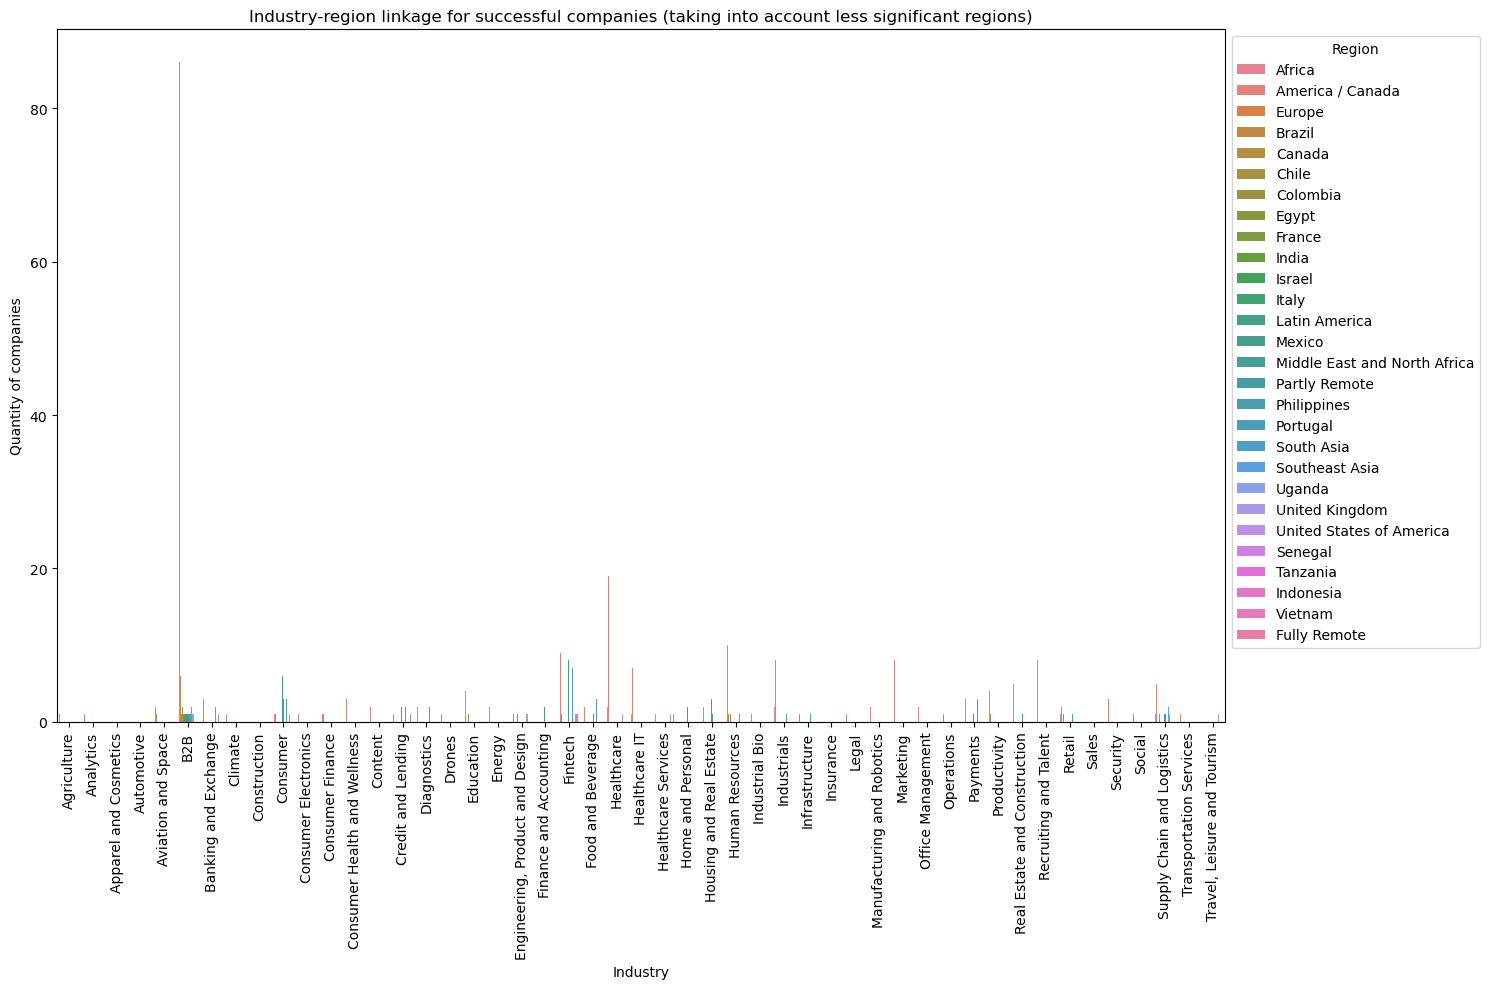

In [51]:
plt.figure(figsize=(15, 10))
sns.barplot(x='industry', y='count', hue='region', data=industry_region_counts)
plt.title('Industry-region linkage for successful companies (taking into account less significant regions)')
plt.xlabel('Industry')
plt.ylabel('Quantity of companies')
plt.xticks(rotation=90)
plt.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

Stacked Barplot: Linking industry and region for successful companies

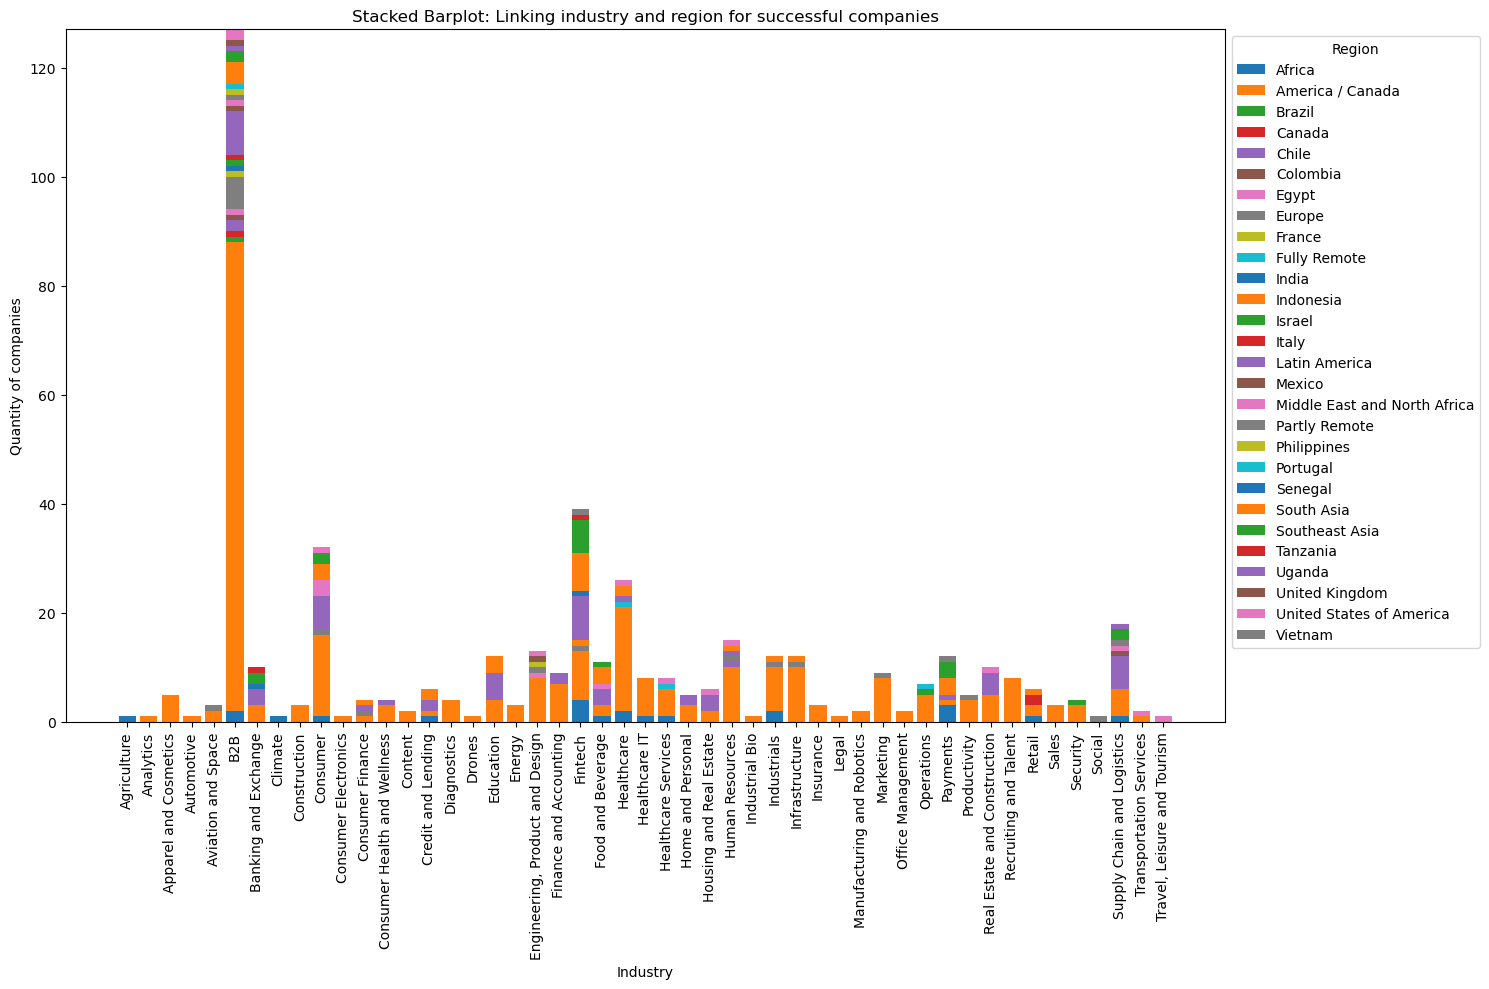

In [53]:
industry_region_grouped = industry_region_counts.groupby(['industry', 'region']).sum().reset_index()
industry_region_pivot = industry_region_grouped.pivot(index='industry', columns='region', values='count').fillna(0)

fig, ax = plt.subplots(figsize=(15, 10))

bottom = np.zeros(len(industry_region_pivot))
for region in industry_region_pivot.columns:
    ax.bar(industry_region_pivot.index, industry_region_pivot[region], label=region, bottom=bottom)
    bottom += industry_region_pivot[region]

# Настраиваем график
plt.title('Stacked Barplot: Linking industry and region for successful companies')
plt.xlabel('Industry')
plt.ylabel('Quantity of companies')
plt.xticks(rotation=90)
plt.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

Treemap: Industries and regions of successful companies

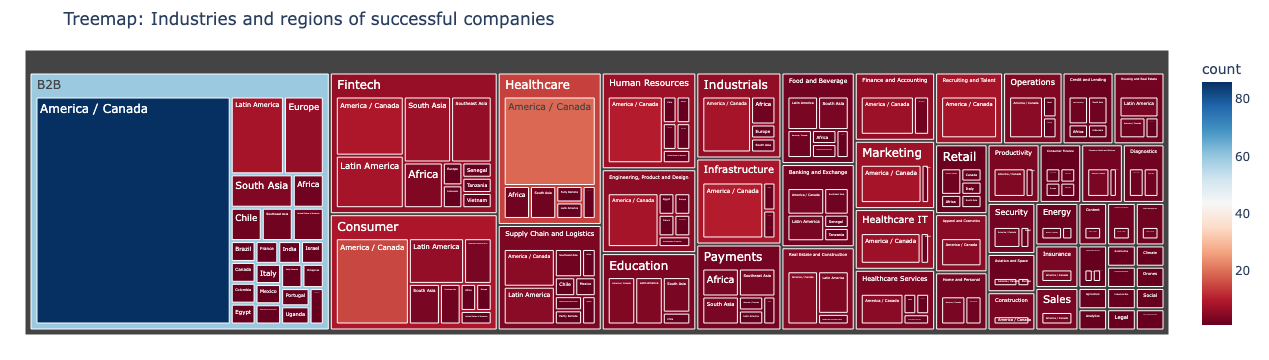

In [55]:
fig = px.treemap(industry_region_grouped, path=['industry', 'region'], values='count', 
                 color='count', hover_data=['industry', 'region'], 
                 color_continuous_scale='RdBu', title='Treemap: Industries and regions of successful companies')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Sunburst: Industries and regions of successful companies

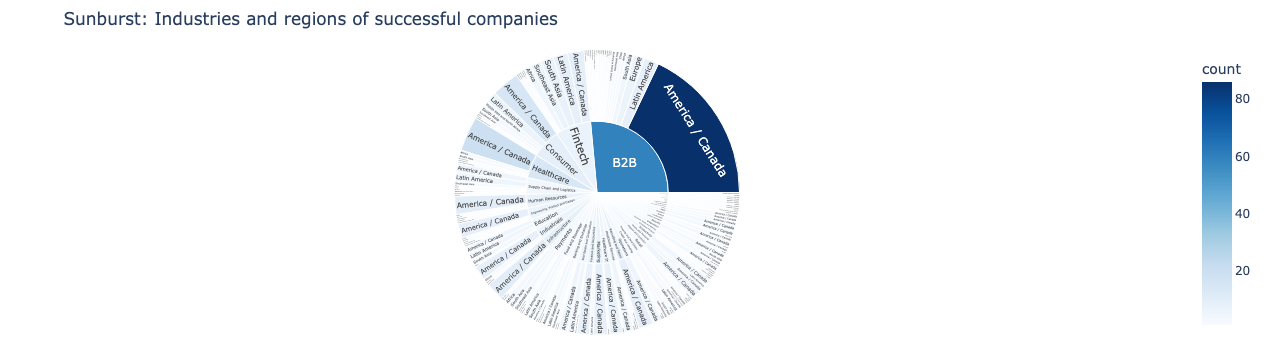

In [57]:
fig = px.sunburst(industry_region_grouped, path=['industry', 'region'], values='count', 
                  color='count', hover_data=['industry', 'region'], 
                  color_continuous_scale='Blues', title='Sunburst: Industries and regions of successful companies')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

# Now that we’ve examined the trends in successful companies, let’s explore what factors contribute to companies that fail!

In [106]:
# I will use the number of employees and status as the ‘Fail’ status 
unsuccessful_companies = companies_df[(companies_df['status'] == 'Inactive') & (companies_df['teamSize'] < 100)]

print(f"Number of unsuccessful companies with a team size greater than 100: {unsuccessful_companies.shape[0]}")

Number of unsuccessful companies with a team size greater than 100: 785


In [62]:
unsuccessful_companies_with_industries = pd.merge(unsuccessful_companies, industries_df, left_on="id", right_on="id", how="left")
unsuccessful_companies_with_industries.head()

Unnamed: 0_x   id      name      slug              website smallLogoUrl  \
0             5  380  Infogami  infogami  http://infogami.com          NaN   
1             5  380  Infogami  infogami  http://infogami.com          NaN   
2             6  377    Memamp    memamp    http://memamp.com          NaN   
3             7  376   Simmery   simmery   http://simmery.com          NaN   
4             7  376   Simmery   simmery   http://simmery.com          NaN   

  oneLiner                                    longDescription  teamSize  \
0      NaN  What is Infogami?\n\nThe art of transforming d...       2.0   
1      NaN  What is Infogami?\n\nThe art of transforming d...       2.0   
2      NaN                    Better Desktop search solution.       0.0   
3      NaN                                                NaN       0.0   
4      NaN                                                NaN       0.0   

                                              url batch    status  \
0  https://www.ycombinator.com/companies/infogami   S05  Inactive   
1  https://www.ycombinator.com/companies/infogami   S05  Inactive   
2    https://www.ycombinator.com/companies/memamp   S05  Inactive   
3   https://www.ycombinator.com/companies/simmery   S05  Inactive   
4   https://www.ycombinator.com/companies/simmery   S05  Inactive   

   Unnamed: 0_y   industry  
0            10        B2B  
1            11  Analytics  
2            12        B2B  
3            13   Consumer  
4            14     Social

Distribution of unsuccessful companies by industry

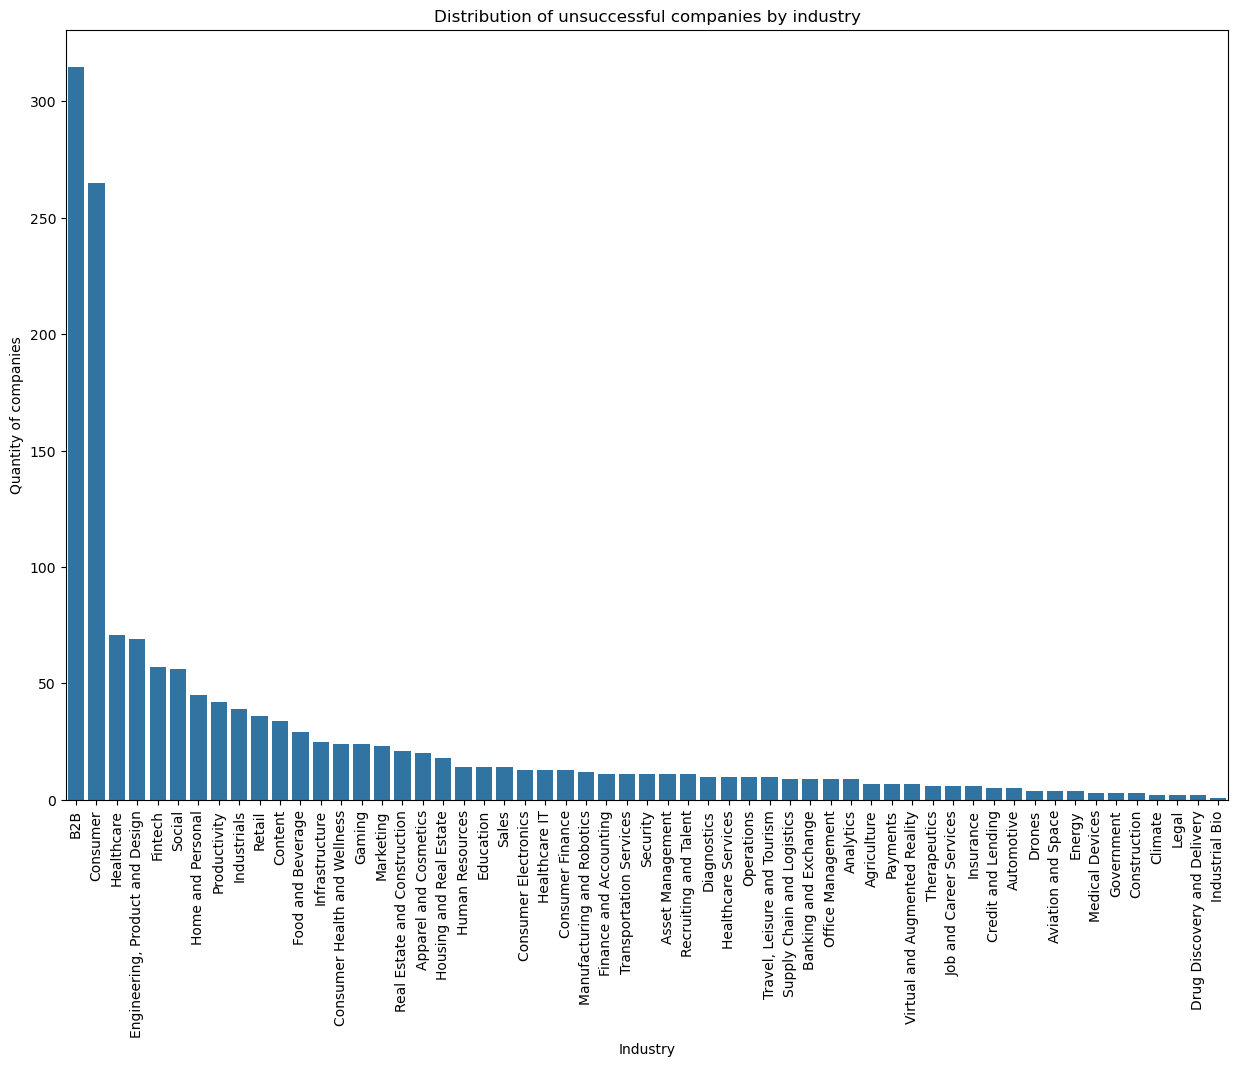

In [108]:
failed_industry_counts_df = unsuccessful_companies_with_industries['industry'].value_counts().reset_index()
failed_industry_counts_df.columns = ['industry', 'count']

plt.figure(figsize=(15, 10))
sns.barplot(x='industry', y='count', data=failed_industry_counts_df)

plt.title('Distribution of unsuccessful companies by industry')
plt.xlabel('Industry')
plt.ylabel('Quantity of companies')
plt.xticks(rotation=90)

plt.show()

In [66]:
unsuccessful_companies_with_regions = pd.merge(unsuccessful_companies, region_df, left_on='id', right_on='id', how='left')
unsuccessful_companies_with_regions.head()

Unnamed: 0_x   id        name        slug                website  \
0             5  380    Infogami    infogami    http://infogami.com   
1             6  377      Memamp      memamp      http://memamp.com   
2             7  376     Simmery     simmery     http://simmery.com   
3            11  365    Jumpchat    jumpchat    http://jumpchat.com   
4            12  364  Likebetter  likebetter  http://likebetter.com   

  smallLogoUrl oneLiner                                    longDescription  \
0          NaN      NaN  What is Infogami?\n\nThe art of transforming d...   
1          NaN      NaN                    Better Desktop search solution.   
2          NaN      NaN                                                NaN   
3          NaN      NaN  A platform bridging mobile text messages, emai...   
4          NaN      NaN  An online personality test game, where you loo...   

   teamSize                                               url batch    status  \
0       2.0    https://www.ycombinator.com/companies/infogami   S05  Inactive   
1       0.0      https://www.ycombinator.com/companies/memamp   S05  Inactive   
2       0.0     https://www.ycombinator.com/companies/simmery   S05  Inactive   
3       2.0    https://www.ycombinator.com/companies/jumpchat   S06  Inactive   
4       2.0  https://www.ycombinator.com/companies/likebetter   S06  Inactive   

   Unnamed: 0_y            region                   country  \
0             5            Europe            United Kingdom   
1             6  America / Canada  United States of America   
2             7  America / Canada  United States of America   
3            11  America / Canada  United States of America   
4            12  America / Canada  United States of America   

                      address  
0                  London, UK  
1         Somerville, MA, USA  
2  Wallingford, CT 06492, USA  
3          Palo Alto, CA, USA  
4          Cambridge, MA, USA

Distribution of unsuccessful companies by region

/var/folders/2c/hpk9j8md6h71406dzkc5_w1m0000gn/T/ipykernel_63579/926854602.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




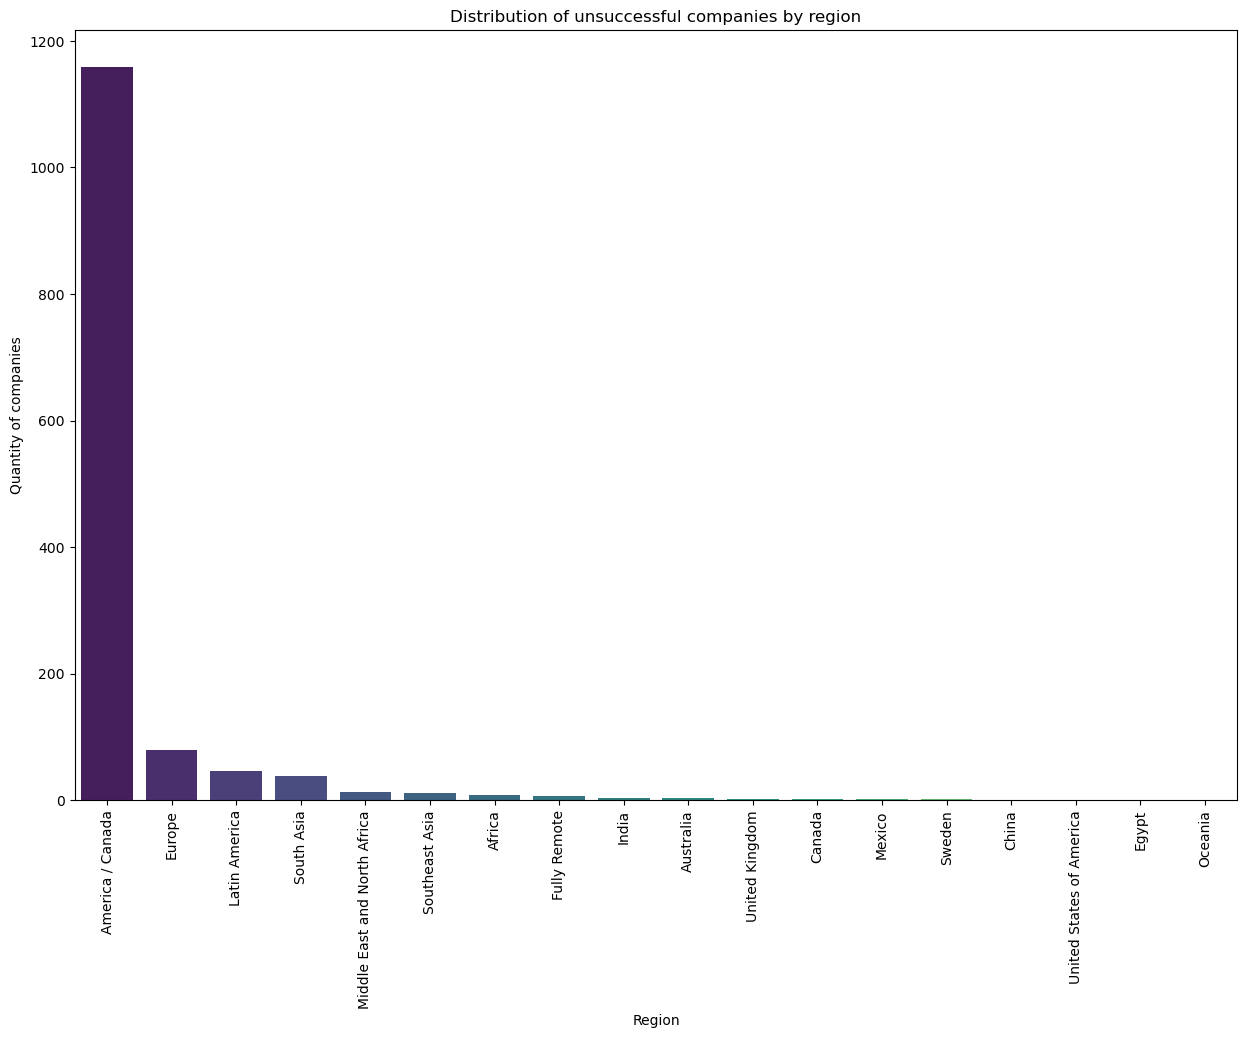

In [110]:
failed_region_counts = unsuccessful_companies_with_regions['region'].value_counts()

plt.figure(figsize=(15, 10))
sns.barplot(x=failed_region_counts.index, y=failed_region_counts.values, palette='viridis')
plt.title('Distribution of unsuccessful companies by region')
plt.xlabel('Region')
plt.ylabel('Quantity of companies')
plt.xticks(rotation=90)
plt.show()

In [72]:
failed_founders_with_schools = pd.merge(founder_df, school_df, on='hnid', how='left')
unsuccessful_companies_with_founders = pd.merge(unsuccessful_companies, failed_founders_with_schools, left_on='slug', right_on='company_slug', how='left')
unsuccessful_companies_with_founders.head()

Unnamed: 0   id      name      slug              website smallLogoUrl  \
0           5  380  Infogami  infogami  http://infogami.com          NaN   
1           5  380  Infogami  infogami  http://infogami.com          NaN   
2           5  380  Infogami  infogami  http://infogami.com          NaN   
3           5  380  Infogami  infogami  http://infogami.com          NaN   
4           5  380  Infogami  infogami  http://infogami.com          NaN   

  oneLiner                                    longDescription  teamSize  \
0      NaN  What is Infogami?\n\nThe art of transforming d...       2.0   
1      NaN  What is Infogami?\n\nThe art of transforming d...       2.0   
2      NaN  What is Infogami?\n\nThe art of transforming d...       2.0   
3      NaN  What is Infogami?\n\nThe art of transforming d...       2.0   
4      NaN  What is Infogami?\n\nThe art of transforming d...       2.0   

                                              url  ... last_name     hnid  \
0  https://www.ycombinator.com/companies/infogami  ...    Swartz  aaronsw   
1  https://www.ycombinator.com/companies/infogami  ...    Swartz  aaronsw   
2  https://www.ycombinator.com/companies/infogami  ...    Swartz  aaronsw   
3  https://www.ycombinator.com/companies/infogami  ...    Swartz  aaronsw   
4  https://www.ycombinator.com/companies/infogami  ...    Swartz  aaronsw   

                 avatar_thumb current_company current_title company_slug  \
0  /avatars/thumb/missing.png        Infogami           NaN     infogami   
1  /avatars/thumb/missing.png        Infogami           NaN     infogami   
2  /avatars/thumb/missing.png        Infogami           NaN     infogami   
3  /avatars/thumb/missing.png        Infogami           NaN     infogami   
4  /avatars/thumb/missing.png        Infogami           NaN     infogami   

  top_company             school    field_of_study    year  
0       False  Aarhus University  Computer Science  2003.0  
1       False  Aarhus University  Computer Science  2004.0  
2       False  Aarhus University  Computer Science  2005.0  
3       False  Aarhus University  Computer Science  2006.0  
4       False  Aarhus University  Computer Science  2007.0  

[5 rows x 23 columns]

Educational institutions of the founders of unsuccessful companies

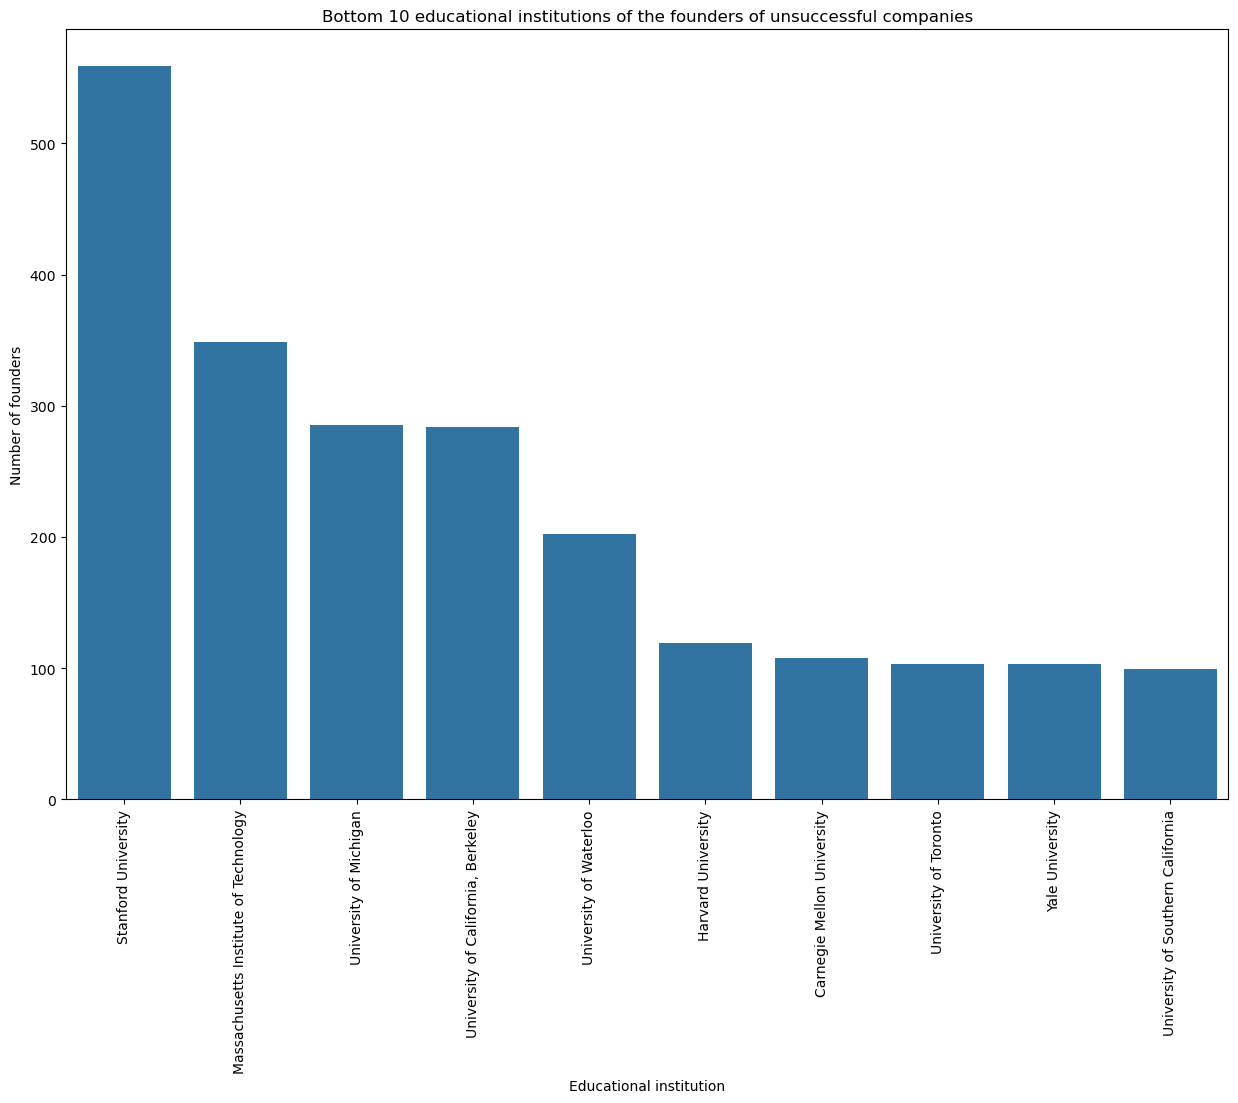

In [169]:
failed_school_counts_df = unsuccessful_companies_with_founders['school'].value_counts().reset_index().head(10)
#failed_school_counts_df = unsuccessful_companies_with_founders['school'].value_counts().reset_index().tail(10)
failed_school_counts_df.columns = ['school', 'count']

plt.figure(figsize=(15, 10))
sns.barplot(x='school', y='count', data=failed_school_counts_df)

plt.title('Bottom 10 educational institutions of the founders of unsuccessful companies')
plt.xlabel('Educational institution')
plt.ylabel('Number of founders')
plt.xticks(rotation=90)

plt.show()

In [78]:
unsuccessful_companies_full = pd.merge(unsuccessful_companies_with_industries, region_df, on='id', how='left')
unsuccessful_companies_full = pd.merge(unsuccessful_companies_full, failed_founders_with_schools, left_on='slug', right_on='company_slug', how='left')
unsuccessful_companies_full.head()

Unnamed: 0_x   id      name      slug              website smallLogoUrl  \
0             5  380  Infogami  infogami  http://infogami.com          NaN   
1             5  380  Infogami  infogami  http://infogami.com          NaN   
2             5  380  Infogami  infogami  http://infogami.com          NaN   
3             5  380  Infogami  infogami  http://infogami.com          NaN   
4             5  380  Infogami  infogami  http://infogami.com          NaN   

  oneLiner                                    longDescription  teamSize  \
0      NaN  What is Infogami?\n\nThe art of transforming d...       2.0   
1      NaN  What is Infogami?\n\nThe art of transforming d...       2.0   
2      NaN  What is Infogami?\n\nThe art of transforming d...       2.0   
3      NaN  What is Infogami?\n\nThe art of transforming d...       2.0   
4      NaN  What is Infogami?\n\nThe art of transforming d...       2.0   

                                              url  ... last_name     hnid  \
0  https://www.ycombinator.com/companies/infogami  ...    Swartz  aaronsw   
1  https://www.ycombinator.com/companies/infogami  ...    Swartz  aaronsw   
2  https://www.ycombinator.com/companies/infogami  ...    Swartz  aaronsw   
3  https://www.ycombinator.com/companies/infogami  ...    Swartz  aaronsw   
4  https://www.ycombinator.com/companies/infogami  ...    Swartz  aaronsw   

                 avatar_thumb current_company  current_title company_slug  \
0  /avatars/thumb/missing.png        Infogami            NaN     infogami   
1  /avatars/thumb/missing.png        Infogami            NaN     infogami   
2  /avatars/thumb/missing.png        Infogami            NaN     infogami   
3  /avatars/thumb/missing.png        Infogami            NaN     infogami   
4  /avatars/thumb/missing.png        Infogami            NaN     infogami   

  top_company             school    field_of_study    year  
0       False  Aarhus University  Computer Science  2003.0  
1       False  Aarhus University  Computer Science  2004.0  
2       False  Aarhus University  Computer Science  2005.0  
3       False  Aarhus University  Computer Science  2006.0  
4       False  Aarhus University  Computer Science  2007.0  

[5 rows x 29 columns]

Correlations between team size, industries, regions and founder education of unsuccessful companies

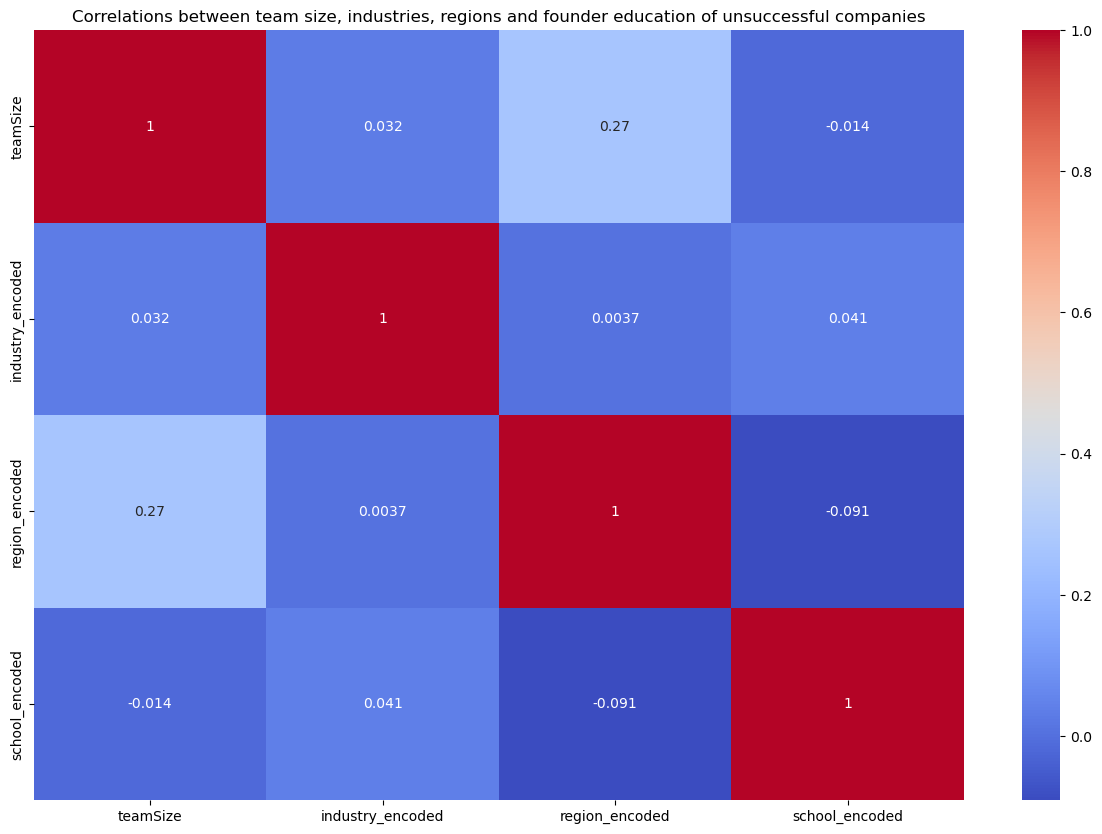

In [120]:
unsuccessful_companies_full['industry_encoded'] = unsuccessful_companies_full['industry'].astype('category').cat.codes
unsuccessful_companies_full['region_encoded'] = unsuccessful_companies_full['region'].astype('category').cat.codes
unsuccessful_companies_full['school_encoded'] = unsuccessful_companies_full['school'].astype('category').cat.codes
corr_matrix_for_failed_companies = unsuccessful_companies_full[['teamSize', 'industry_encoded', 'region_encoded', 'school_encoded']].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_for_failed_companies, annot=True, cmap='coolwarm')
plt.title('Correlations between team size, industries, regions and founder education of unsuccessful companies')
plt.show()

In [82]:
unsuccessful_companies_with_regions = pd.merge(unsuccessful_companies_with_industries, region_df, on='id', how='left')
unsuccessful_companies_with_regions.head()

Unnamed: 0_x   id      name      slug              website smallLogoUrl  \
0             5  380  Infogami  infogami  http://infogami.com          NaN   
1             5  380  Infogami  infogami  http://infogami.com          NaN   
2             6  377    Memamp    memamp    http://memamp.com          NaN   
3             7  376   Simmery   simmery   http://simmery.com          NaN   
4             7  376   Simmery   simmery   http://simmery.com          NaN   

  oneLiner                                    longDescription  teamSize  \
0      NaN  What is Infogami?\n\nThe art of transforming d...       2.0   
1      NaN  What is Infogami?\n\nThe art of transforming d...       2.0   
2      NaN                    Better Desktop search solution.       0.0   
3      NaN                                                NaN       0.0   
4      NaN                                                NaN       0.0   

                                              url batch    status  \
0  https://www.ycombinator.com/companies/infogami   S05  Inactive   
1  https://www.ycombinator.com/companies/infogami   S05  Inactive   
2    https://www.ycombinator.com/companies/memamp   S05  Inactive   
3   https://www.ycombinator.com/companies/simmery   S05  Inactive   
4   https://www.ycombinator.com/companies/simmery   S05  Inactive   

   Unnamed: 0_y   industry  Unnamed: 0            region  \
0            10        B2B           5            Europe   
1            11  Analytics           5            Europe   
2            12        B2B           6  America / Canada   
3            13   Consumer           7  America / Canada   
4            14     Social           7  America / Canada   

                    country                     address  
0            United Kingdom                  London, UK  
1            United Kingdom                  London, UK  
2  United States of America         Somerville, MA, USA  
3  United States of America  Wallingford, CT 06492, USA  
4  United States of America  Wallingford, CT 06492, USA

In [84]:
threshold = 10
failed_industry_region_count = unsuccessful_companies_with_regions.groupby(['industry', 'region']).size().reset_index(name='count')


In [94]:
# Step 1: Precompute the total counts per region
failed_region_totals = failed_industry_region_count.groupby("region")["count"].sum()

# Step 2: Apply the threshold condition once for each region
failed_industry_region_count["region"] = failed_industry_region_count["region"].apply(
    lambda x: x if failed_region_totals[x] > threshold else "Other"
)

Industry-region linkage for unsuccessful companies (taking into account less significant regions)

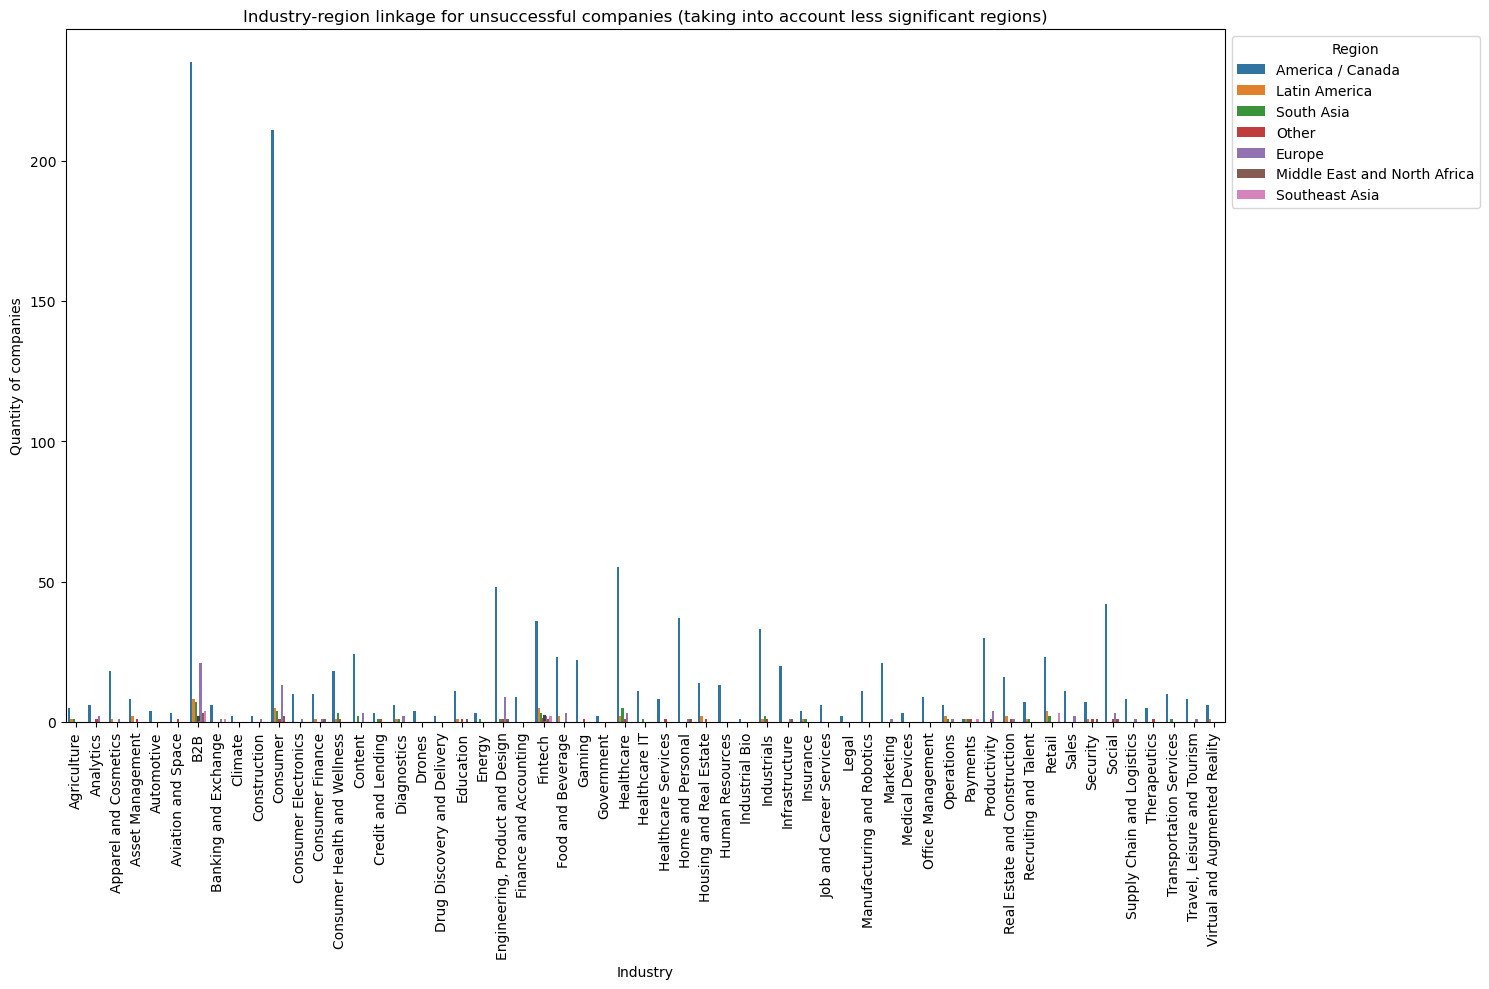

In [122]:
plt.figure(figsize=(15, 10))
sns.barplot(x='industry', y='count', hue='region', data=failed_industry_region_count)
plt.title('Industry-region linkage for unsuccessful companies (taking into account less significant regions)')
plt.xlabel('Industry')
plt.ylabel('Quantity of companies')
plt.xticks(rotation=90)
plt.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

Stacked Barplot: Linking industry and region for unsuccessful companies

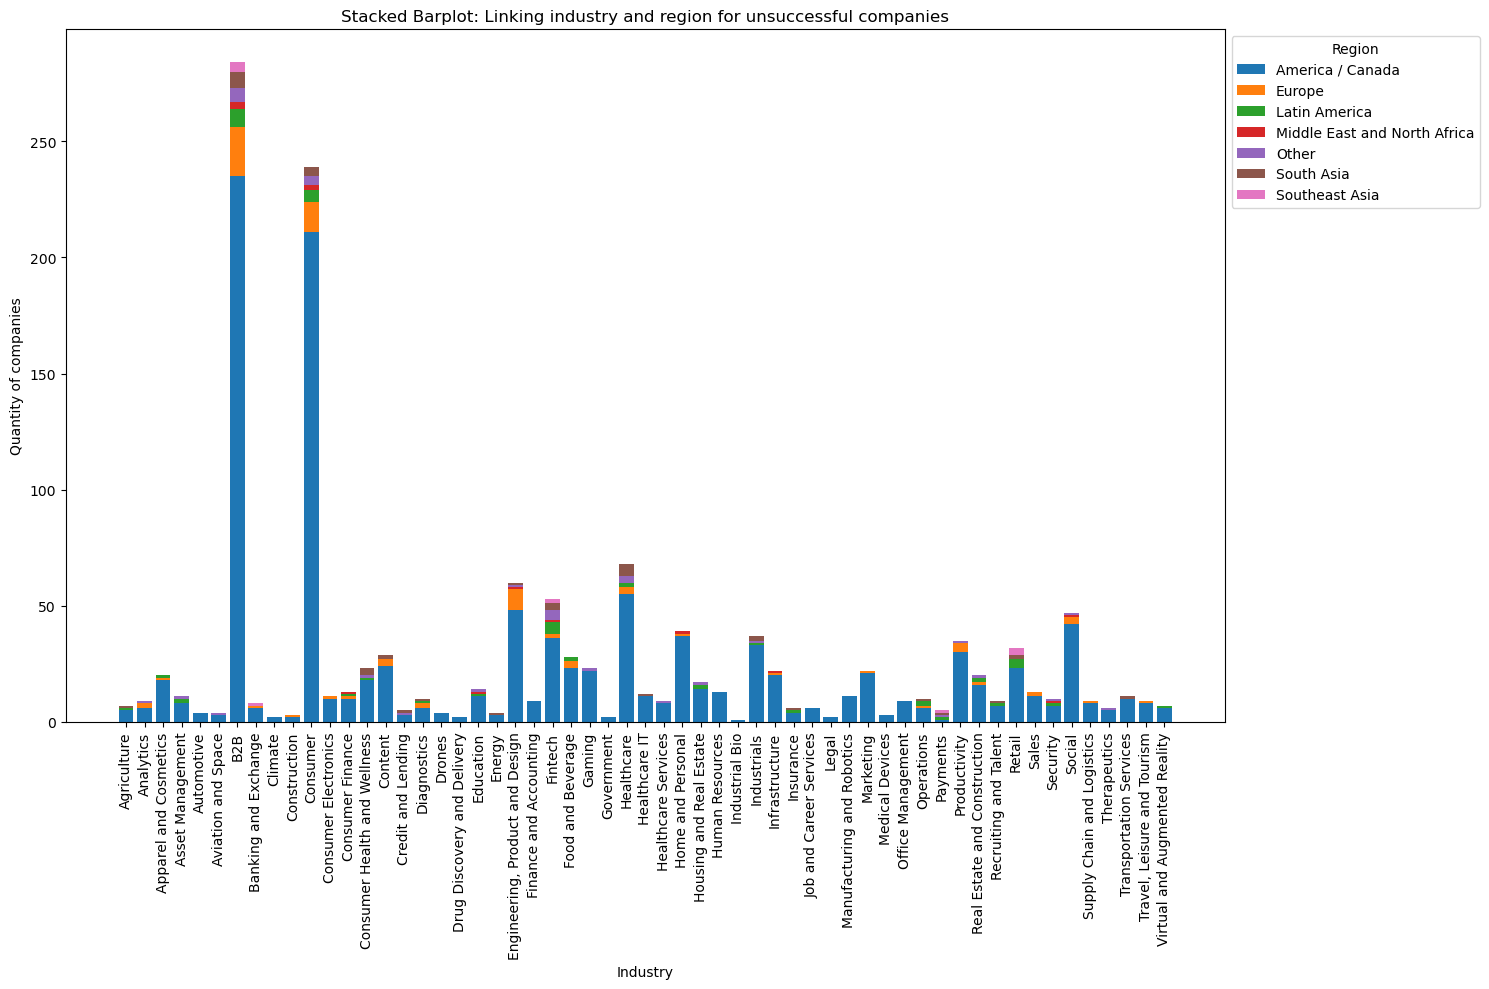

In [124]:
failed_industry_region_grouped = failed_industry_region_count.groupby(['industry', 'region']).sum().reset_index()
failed_industry_region_pivot = failed_industry_region_grouped.pivot(index='industry', columns='region', values='count').fillna(0)

fig, ax = plt.subplots(figsize=(15, 10))

bottom = np.zeros(len(failed_industry_region_pivot))
for region in failed_industry_region_pivot.columns:
    ax.bar(failed_industry_region_pivot.index, failed_industry_region_pivot[region], label=region, bottom=bottom)
    bottom += failed_industry_region_pivot[region]


plt.title('Stacked Barplot: Linking industry and region for unsuccessful companies')
plt.xlabel('Industry')
plt.ylabel('Quantity of companies')
plt.xticks(rotation=90)
plt.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

Treemap: Industries and regions of unsuccessful companies

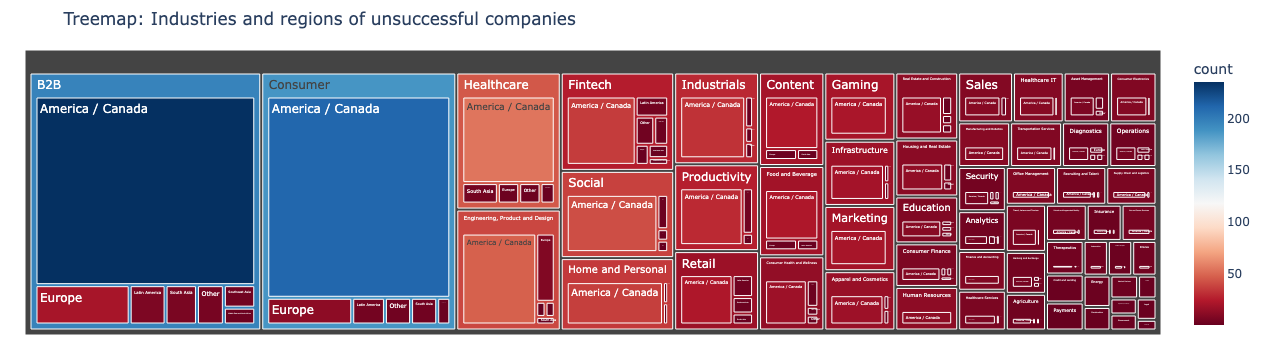

In [126]:
fig = px.treemap(failed_industry_region_grouped, path=['industry', 'region'], values='count', 
                 color='count', hover_data=['industry', 'region'], 
                 color_continuous_scale='RdBu', title='Treemap: Industries and regions of unsuccessful companies')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Sunburst: Industries and regions of unsuccessful companies

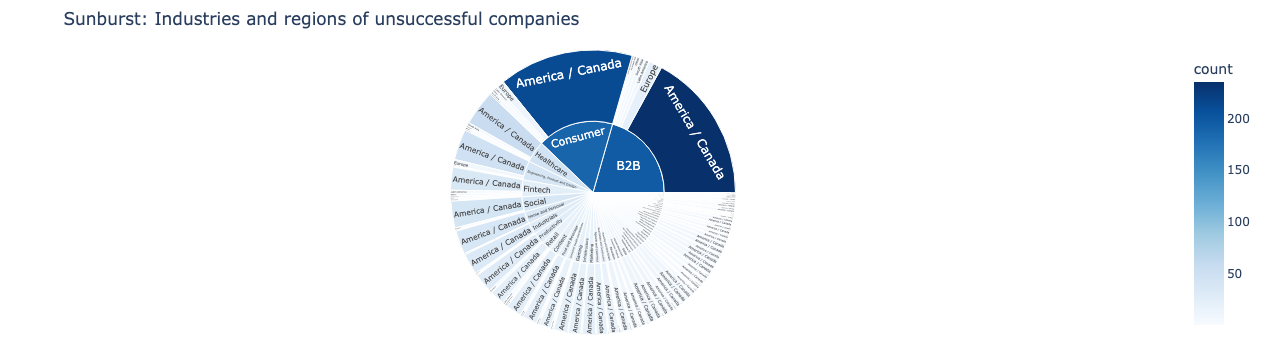

In [128]:
fig = px.sunburst(failed_industry_region_grouped, path=['industry', 'region'], values='count', 
                  color='count', hover_data=['industry', 'region'], 
                  color_continuous_scale='Blues', title='Sunburst: Industries and regions of unsuccessful companies')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()